In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score
from darts.datasets import EnergyDataset

import warnings
import logging
warnings.filterwarnings("ignore")
logging.disable(logging.CRITICAL)

In [2]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

Text(0.5, 1.0, 'Hourly generation hydro run-of-river and poundage')

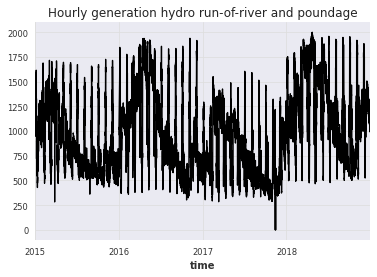

In [3]:
df = EnergyDataset().load().pd_dataframe()
df["generation hydro run-of-river and poundage"].plot()
plt.title("Hourly generation hydro run-of-river and poundage")

Text(0.5, 1.0, 'Daily generation hydro run-of-river and poundage')

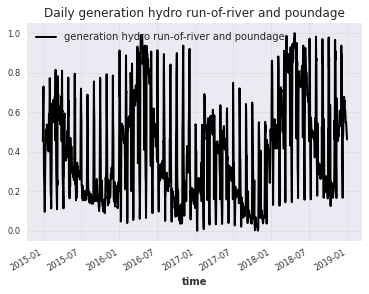

In [4]:
df_day_avg = df.groupby(df.index.astype(str).str.split(" ").str[0]).mean().reset_index()
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            df_day_avg, "time", ["generation hydro run-of-river and poundage"]
        )
    )
).astype(np.float32)
series.plot()
plt.title("Daily generation hydro run-of-river and poundage")

In [5]:
train, val = series.split_after(pd.Timestamp("20170901"))

In [6]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)

  0%|          | 0/97 [00:00<?, ?it/s]

2022-07-26 23:15:03 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 939 samples.
2022-07-26 23:15:03 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
2022-07-26 23:15:03 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-26 23:15:03 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-26 23:15:03 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-26 23:15:03 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
/home/noone/anaconda3/envs/time_series_toolbox_darts/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1814: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
2022-07-26 23:15:03 pytorch_lightning.callbacks.model_summary INFO: 
  | Name       

Training: 0it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

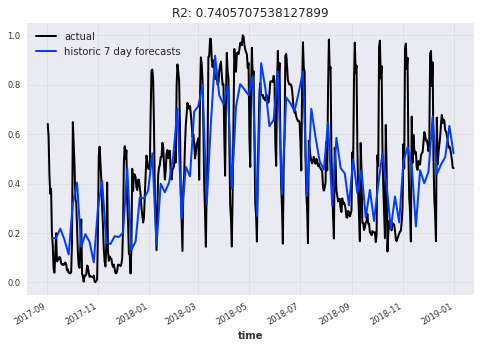

In [7]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp("20170901"),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)
display_forecast(
    pred_series,
    series,
    "7 day",
    start_date=pd.Timestamp("20170901")
)

In [8]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=False,
    num_blocks=3,
    num_layers=4,
    layer_widths=512,
    n_epochs=100,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_interpretable_run",
)

In [9]:
model_nbeats.fit(series=train, val_series=val, verbose=True)

2022-07-26 23:16:56 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 940 samples.
2022-07-26 23:16:56 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 32-bits; casting model to float32.
2022-07-26 23:16:56 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-07-26 23:16:56 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-07-26 23:16:56 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-07-26 23:16:56 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
/home/noone/anaconda3/envs/time_series_toolbox_darts/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1814: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
2022-07-26 23:16:56 pytorch_lightning.callbacks.model_summary INFO: 
  | Name       

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

Predicting: 2it [00:00, ?it/s]

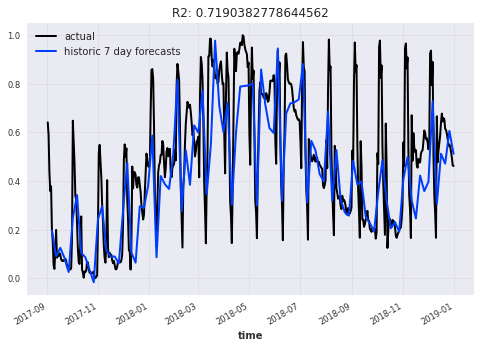

In [10]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp("20170901"),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)
display_forecast(pred_series, series, "7 day", start_date=pd.Timestamp("20170901"))